In [1186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import chardet 
import itertools

In [1277]:
data = pd.read_csv('https://raw.githubusercontent.com/Zhulik2018/Home-work-SF/main/Files_for_SF/movie_bd_v5.csv')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
797,tt1598778,60000000,135458097,Contagion,Matt Damon|Gwyneth Paltrow|Kate Winslet|Jude L...,Steven Soderbergh,Nothing spreads like fear,Contagion follows the rapid progress of a leth...,106,Drama|Thriller|Science Fiction,Double Feature Films|Regency Enterprises|Warne...,9/8/2011,6.1,2011
71,tt3488710,35000000,61181942,The Walk,Joseph Gordon-Levitt|Ben Kingsley|Charlotte Le...,Robert Zemeckis,Dream High.,The story of French high-wire artist Philippe ...,123,Adventure|Drama|Thriller,TriStar Pictures|Sony Pictures Entertainment|I...,9/30/2015,6.8,2015
968,tt0246464,40000000,8493890,Big Trouble,Tim Allen|Rene Russo|Patrick Warburton|Ben Fos...,Barry Sonnenfeld,They have forty-five minutes to save the world...,The story of how a mysterious suitcase brings ...,85,Action|Comedy|Thriller,Touchstone Pictures,4/5/2002,6.2,2002
719,tt0494652,35000000,43650785,Welcome Home Roscoe Jenkins,Martin Lawrence|James Earl Jones|Margaret Aver...,Malcolm D. Lee,Roscoe Jenkins aims for the heartstrings and f...,"Martin Lawrence leads an all-star cast, includ...",114,Comedy|Drama,Universal Pictures|Spyglass Entertainment,2/8/2008,6.1,2008
10,tt2379713,245000000,880674609,Spectre,Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...,Sam Mendes,A Plan No One Escapes,A cryptic message from Bondâ€™s past sends him...,148,Action|Adventure|Crime,Columbia Pictures|Danjaq|B24,10/26/2015,6.2,2015


In [1188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


In [1189]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


# Предобработка

In [1276]:
answers = {} # create a dictionary for answers

In [1275]:
#The time given in the dataset is in string format.
#So we need to change this in datetime format.
data['release_date'] = pd.to_datetime(data['release_date'])

In [1274]:
# Add editional column with value 'profit'
data['profit'] = data['revenue'] - data ['budget']

In [1191]:
def listmerge(lstlst):
    '"Function to combine lists within a list"'  
    all=[]
    for lst in lstlst:
        all.extend(lst)
    return all

In [1192]:
def words_counter(s):
    '"Function to calculate the number of words in string"'
    count = 0
    flag = 0
    for i in range(len(s)):
        if s[i] != ' ' and flag == 0:
            count += 1
            flag = 1
        else:
            if s[i] == ' ':
                flag = 0
    return count

# 1. У какого фильма из списка самый большой бюджет?

ВАРИАНТ 1

In [1193]:
data.original_title[(data.budget == data.budget.max())]

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

ВАРИАНТ 2

In [1194]:
data.loc[(data.budget == data.budget.max())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,6.3,2011,641683000


In [1195]:
answers['1'] = '723. Pirates of the Caribbean: On Stranger Tides (tt1298650)'

# 2. Какой из фильмов самый длительный (в минутах)?

ВАРИАНТ 1

In [1196]:
data.loc[(data.runtime == data.runtime.max())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1157,tt0279111,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,The nations heart was touched by...,The film centers mostly around the personal an...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2003-02-21,5.8,2003,-43076064


ВАРИАНТ 2

In [1197]:
data.sort_values(['runtime'], ascending=False).head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1157,tt0279111,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,The nations heart was touched by...,The film centers mostly around the personal an...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2003-02-21,5.8,2003,-43076064


In [1198]:
answers['2'] = '1157. Gods and Generals (tt0279111)'

# 3. Какой из фильмов самый короткий (в минутах)?





ВАРИАНТ 1

In [1199]:
data.loc[(data.runtime == data.runtime.min())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
768,tt1449283,30000000,14460000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2011-04-13,6.8,2011,-15540000


ВАРИАНТ 2

In [1200]:
data[(data.runtime == data.runtime.min())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
768,tt1449283,30000000,14460000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2011-04-13,6.8,2011,-15540000


ВАРИАНТ 3

In [1201]:
data.original_title[(data.runtime == data.runtime.min())]

768    Winnie the Pooh
Name: original_title, dtype: object

ВАРИАНТ 4

In [1202]:
data.sort_values(['runtime'], ascending=True).head(1)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
768,tt1449283,30000000,14460000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2011-04-13,6.8,2011,-15540000


In [1203]:
answers['3'] = '768. Winnie the Pooh (tt1449283)'

# 4. Какова средняя длительность фильмов?


In [1204]:
data.runtime.mean()

109.6585494970884

In [1205]:
answers['4'] = '110'

# 5. Каково медианное значение длительности фильмов? 

In [1206]:
data.runtime.median()

107.0

In [1207]:
answers['5'] = '107'

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [1208]:
data[(data.profit == data.profit.max())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
239,tt0499549,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,2544505847


In [1210]:
answers['6'] = '239. Avatar (tt0499549)'

# 7. Какой фильм самый убыточный? 

In [1211]:
data[(data.profit == data.profit.min())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,-165710090


In [1212]:
answers['7'] = '1245. The Lone Ranger (tt1210819)'

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [1213]:
len(data[(data.revenue > data.budget)])

1478

In [1214]:
answers['8'] = '1478'

# 9. Какой фильм оказался самым кассовым в 2008 году?

ВАРИАНТ 1

In [1215]:
data[(data.revenue == data[(data.release_year == 2008)].revenue.max())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
599,tt0468569,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8.1,2008,816921825


ВАРИАНТ 2

In [1216]:
data.original_title[(data.revenue == data[(data.release_year == 2008)].revenue.max())]

599    The Dark Knight
Name: original_title, dtype: object

In [1217]:
answers['9'] = '599. The Dark Knight (tt0468569)'

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


ВАРИАНТ 1

In [1218]:
data[(data.profit == data[((data.release_year <= 2014)
                           &(data.release_year >= 2012))].profit.min())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,-165710090


ВАРИАНТ 2

In [1219]:
data[(data.release_year <= 2014)&(data.release_year >= 2012)
                    ].sort_values(['profit'],ascending=True)[:1]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,-165710090


In [1220]:
answers['10'] = '1245. The Lone Ranger (tt1210819)'

# 11. Какого жанра фильмов больше всего?

ВАРИАНТ 1

In [1221]:
d_G = data.copy()
d_G.genres = d_G.genres.str.split('|')
d_G = d_G.explode('genres')
d_G['genres'].value_counts()[:1]

Drama    782
Name: genres, dtype: int64

ВАРИАНТ 2

In [1222]:
d_1 = data.copy()
d_1['genres'].str.split('|').explode().value_counts()[:1]

Drama    782
Name: genres, dtype: int64

ВАРИАНТ 3

In [1223]:
d_2 = data.copy()
d_2.genres = d_2.genres.str.split('|')
s_genres = d_2['genres'].tolist()
Counter(listmerge(s_genres)).most_common(1)

[('Drama', 782)]

ВАРИАНТ 4

In [1224]:
pd.Series(data['genres'].str.cat(sep='|').split('|')).value_counts()[:1]

Drama    782
dtype: int64

In [1225]:
answers['11'] = 'Drama'

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

ВАРИАНТ 1

In [1226]:
pd.Series(data[(data.revenue > data.budget)].genres.str.split('|').explode()).value_counts()[:1]

Drama    560
Name: genres, dtype: int64

ВАРИАНТ 2

In [1227]:
d_3 = data.copy()
d_3[d_3.revenue > d_3.budget]['genres'].str.split('|').explode().value_counts()[:1]

Drama    560
Name: genres, dtype: int64

In [1228]:
answers['12'] = 'Drama'

# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [1229]:
max_revenue = data.copy()
max_revenue.director = max_revenue.director.str.split('|')
max_revenue = max_revenue.explode('director')
max_revenue.groupby(['director'])['revenue'].sum().sort_values(ascending=False)[:1]

director
Peter Jackson    6490593685
Name: revenue, dtype: int64

In [1230]:
answers['13'] = 'Peter Jackson'

# 14. Какой режисер снял больше всего фильмов в стиле Action?

ВАРИАНТ 1

In [1231]:
# Using datadframe d_G from task 11 with formatted column "genres"
pd.Series(d_G[(d_G.genres == 'Action')].director.str.split('|').explode()).value_counts()[:1]

Robert Rodriguez    9
Name: director, dtype: int64

ВАРИАНТ 2

In [1278]:
d_g = d_G.copy() # Using datadframe d_G from task 11 with formatted column "genres"
d_g.director = d_g.director.str.split('|')
d_g = d_g.explode('director')
action = d_g.pivot_table(values = "imdb_id", 
                         index = "genres", 
                         columns = "director", 
                         aggfunc = "count",
                         fill_value=0)
action.sort_values(by='Action', ascending=False, axis=1)[action.index == 'Action']

director,Robert Rodriguez,Paul W.S. Anderson,Michael Bay,Ridley Scott,Antoine Fuqua,Brett Ratner,Lee Tamahori,Gore Verbinski,Peter Berg,Louis Leterrier,...,Jennifer Yuh,Jeremy Garelick,Jerry Zucker,Jesse Dylan,Jesse Peretz,Jessie Nelson,Jill Culton,Jim Fall,Jim Field Smith,Zal Batmanglij
genres,,,,,,,,,,,,,,,,,,,,,
Action,9,7,7,6,6,5,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0


ВАРИАНТ 3

In [1279]:
# Using datadframe d_G from task 11 with formatted column "genres"
act_movie = d_G[d_G.genres == 'Action'].copy()
act_movie.director = act_movie.director.str.split('|')
act_movie = act_movie.explode('director')
act_movie.groupby(['director'])['imdb_id'].count().sort_values(ascending=False)[:1]

director
Robert Rodriguez    9
Name: imdb_id, dtype: int64

In [1234]:
answers['14'] = 'Robert Rodriguez'

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

ВАРИАНТ 1

In [1235]:
data_2012 = data[(data.release_year == 2012)].copy()
data_2012.cast = data_2012.cast.str.split('|')
data_2012 = data_2012.explode('cast')
data_2012.groupby(['cast'])['revenue'].sum().sort_values(ascending=False)[:1]

cast
Chris Hemsworth    2027450773
Name: revenue, dtype: int64

ВАРИАНТ 2

In [1236]:
d_4 = data[(data.release_year == 2012)].copy()
d_4.cast = d_4.cast.str.split('|')
d_4 = d_4.explode('cast')
pivot_4 = d_4.pivot_table(values = "revenue", 
                          index = "release_year", 
                          columns = "cast", 
                          aggfunc = "sum", 
                          fill_value=0)
pivot_4.sort_values(by=2012, ascending=False, axis=1)

cast,Chris Hemsworth,Denis Leary,Anne Hathaway,Robert Downey Jr.,Mark Ruffalo,Chris Evans,Scarlett Johansson,Ralph Fiennes,Sacha Baron Cohen,Kristen Stewart,...,Josh Duhamel,Hope Davis,Frank Grillo,Jason Bateman,Paula Patton,Michael Nyqvist,Danny Huston,Josh Lucas,Sami Gayle,Nicolas Cage
release_year,,,,,,,,,,,,,,,,,,,,,
2012,2027450773,1629460639,1522851057,1519557910,1519557910,1519557910,1519557910,1409561013,1368110577,1234384318,...,4636169,3428048,3428048,3428048,3428048,3428048,2106557,2106557,2106557,2106557


In [1237]:
answers['15'] = 'Chris Hemsworth'

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

ВАРИАНТ 1

In [1238]:
high_budget = data[(data.budget > data.budget.mean())].copy()
high_budget.cast = high_budget.cast.str.split('|')
high_budget = high_budget.explode('cast')
high_budget.groupby(['cast'])['budget'].count().sort_values(ascending=False)[:5]

cast
Matt Damon        18
Adam Sandler      17
Angelina Jolie    16
Tom Cruise        15
Eddie Murphy      15
Name: budget, dtype: int64

ВАРИАНТ 2

In [1239]:
d_5 = data.copy()
pd.Series(d_5[d_5.budget > d_5.budget.mean()].cast.str.cat(sep='|').split('|')).value_counts()[:1]

Matt Damon    18
dtype: int64

ВАРИАНТ 3

In [1240]:
d_6 = data.copy()
d_6[d_6.budget > data_6.budget.mean()]['cast'].str.split('|').explode().value_counts()[:1]

Matt Damon    18
Name: cast, dtype: int64

In [1241]:
answers['16'] = 'Matt Damon'

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [1280]:
d_7 = data_1.copy() # Using datadframe data_1 from task 11 with formatted column "genres"
d_7.cast = d_7.cast.str.split('|')
d_7 = d_7.explode('cast')
d_7.groupby(['cast'])['genres'].value_counts().sort_values(ascending=False)['Nicolas Cage'][:1]

genres
Action    17
Name: genres, dtype: int64

In [1243]:
answers['17'] = 'Action'

# 18. Самый убыточный фильм от Paramount Pictures

ВАРИАНТ 1

In [1244]:
d_8 = data.copy()
d_8.production_companies = d_8.production_companies.str.split('|')
d_8 = d_8.explode('production_companies')
d_8a = d_8[d_8.production_companies.str.contains("Paramount Pictures", na=False)]
d_8a[(d_8a.profit == d_8a.profit.min())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
925,tt0267626,100000000,35168966,K-19: The Widowmaker,Harrison Ford|Liam Neeson|Peter Sarsgaard|Joss...,Kathryn Bigelow,Fate has found its hero.,When Russia's first nuclear submarine malfunct...,138,Thriller|Drama|History,Paramount Pictures,2002-07-19,6.0,2002,-64831034


ВАРИАНТ 2

In [1245]:
# Using datadframe d_8 from the previous variant with formatted column "production_companies"
d_8b = d_8[d_8.production_companies.map(lambda x: True if "Paramount Pictures" in x else False)]
d_8b[(d_8b.profit == d_8b.profit.min())]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
925,tt0267626,100000000,35168966,K-19: The Widowmaker,Harrison Ford|Liam Neeson|Peter Sarsgaard|Joss...,Kathryn Bigelow,Fate has found its hero.,When Russia's first nuclear submarine malfunct...,138,Thriller|Drama|History,Paramount Pictures,2002-07-19,6.0,2002,-64831034


In [1246]:
answers['18'] = '925. K-19: The Widowmaker (tt0267626)'

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [1247]:
d_9 = data.copy()
d_9.groupby(['release_year'])['revenue'].sum().sort_values(ascending=False).head(1)

release_year
2015    25449202382
Name: revenue, dtype: int64

In [1248]:
answers['19'] = '2015'

# 20. Какой самый прибыльный год для студии Warner Bros?

ВАРИАНТ 1

In [1249]:
d_10 = data.copy()
d_10.production_companies = d_10.production_companies.str.split('|')
d_10 = d_10.explode('production_companies')
WB = d_10[d_10.production_companies.str.contains("Warner Bros", na=False)]
WB.groupby(['release_year'])['profit'].sum().sort_values(ascending=False)[:1]

release_year
2014    2292949646
Name: profit, dtype: int64

ВАРИАНТ 2

In [1250]:
d_10a = data.copy()
d_10a.production_companies = d_10a.production_companies.str.split('|')
d_10a = d_10a.explode('production_companies')
d_WB = d_10a[d_10a.production_companies.map(lambda x: True if "Warner Bros" in x else False)]
d_WB.groupby(['release_year'])['profit'].sum().sort_values(ascending=False).head(1)

release_year
2014    2292949646
Name: profit, dtype: int64

In [1251]:
answers['20'] = '2014'

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

ВАРИАНТ 1

In [1252]:
data_month = data.copy()
data_month['month_release'] = data_month['release_date'].dt.month
data_month['month_release'].value_counts(ascending=False)[:1]

9    227
Name: month_release, dtype: int64

ВАРИАНТ 2

<AxesSubplot:>

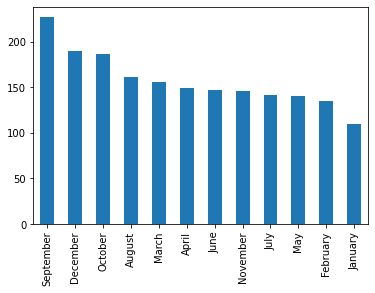

In [1273]:
data_m = data.copy()
data_m['month_release'] = data_m['release_date'].apply(lambda x: x.strftime('%B'))
data_m['month_release'].value_counts().plot(kind='bar')

In [1254]:
answers['21'] = 'September'

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

ВАРИАНТ 1

In [1255]:
# Using datadframe data_month from task 21
len(data_month[(data_month.month_release == 6
               )|(data_month.month_release == 7
                 )|(data_month.month_release == 8)])

450

ВАРИАНТ 2

In [1256]:
# Using datadframe data_m from task 21
len(data_m[(data_m.month_release == 'June'
           )|(data_m.month_release == 'July'
             )|(data_m.month_release == 'August'
               )])

450

In [1257]:
answers['22'] = '450'

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [1258]:
# Using datadframe data_m from task 21
data_winter = data_m[(data_m.month_release == 'January'
                     )|(data_m.month_release == 'December'
                       )|(data_m.month_release == 'February'
                         )].copy()
data_winter['director'].str.split('|').explode().value_counts()[:1]

Peter Jackson    7
Name: director, dtype: int64

In [1259]:
answers['23'] = 'Peter Jackson'

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [1260]:
long_title = data.copy()
long_title['num_symbols'] = long_title['original_title'].apply(lambda x: len(x))
long_title.production_companies = long_title.production_companies.str.split('|')
long_title = long_title.explode('production_companies')
long_title.groupby(['production_companies']
                  )['num_symbols'].mean().sort_values(ascending=False).head(1)

production_companies
Four By Two Productions    83.0
Name: num_symbols, dtype: float64

In [1261]:
answers['24'] = 'Four By Two Productions'

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [1262]:
d_11 = data.copy()
d_11['lenth_overview'] = d_11.overview.apply(words_counter)
d_11.production_companies = d_11.production_companies.str.split('|')
d_11 = d_11.explode('production_companies')
d_11.groupby(['production_companies'])['lenth_overview'].mean().sort_values(ascending=False)[:1]

production_companies
Midnight Picture Show    175.0
Name: lenth_overview, dtype: float64

In [1263]:
answers['25'] = 'Midnight Picture Show'

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [1264]:
d_12 = data.copy()
rating_99 = np.percentile(d_12.vote_average, 99)
best_one = d_12[d_12.vote_average >= rating_99].copy()
best_one.sort_values(by='vote_average', ascending=False).original_title.unique()

array(['The Dark Knight', 'Inside Out', 'Room', 'Interstellar',
       'The Imitation Game', 'Inception', '12 Years a Slave',
       'The Wolf of Wall Street',
       'The Lord of the Rings: The Return of the King', 'The Pianist',
       'Memento', 'Guardians of the Galaxy', 'The Grand Budapest Hotel',
       'Gone Girl', 'Mr. Nobody', 'There Will Be Blood',
       'Eternal Sunshine of the Spotless Mind', 'The Prestige',
       'Dallas Buyers Club', 'Prisoners', 'Big Hero 6', 'Her', '3 Idiots',
       'The Lord of the Rings: The Two Towers',
       'The Theory of Everything', 'Spotlight', 'The Fault in Our Stars',
       'The Lord of the Rings: The Fellowship of the Ring'], dtype=object)

In [1265]:
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave'

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


ВАРИАНТ 1

In [1266]:
d_13 = data.copy()
d_13.cast = d_13.cast.str.split('|')
union_cast = list(d_13['cast'].apply(lambda x: list(itertools.combinations(sorted(list(x)), 2))))
all_pairs = [item for sublist in union_cast for item in sublist]
Counter(all_pairs).most_common(5)

[(('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Emma Watson', 'Rupert Grint'), 8),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Helena Bonham Carter', 'Johnny Depp'), 6)]

In [1267]:
answers['27'] = 'Daniel Radcliffe & Rupert Grint'

ВАРИАНТ 2

In [1268]:
d_14 = data.copy()
d_14.cast = d_14.cast.str.split('|')
uni_cast = d_14['cast'].apply(lambda x: list(itertools.combinations(sorted(list(x)), 2))).tolist()
Counter(listmerge(uni_cast)).most_common(5)

[(('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Emma Watson', 'Rupert Grint'), 8),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Helena Bonham Carter', 'Johnny Depp'), 6)]

# Submission

In [1269]:
answers

{'1': '723. Pirates of the Caribbean: On Stranger Tides (tt1298650)',
 '2': '1157. Gods and Generals (tt0279111)',
 '3': '768. Winnie the Pooh (tt1449283)',
 '4': '110',
 '5': '107',
 '6': '239. Avatar (tt0499549)',
 '7': '1245. The Lone Ranger (tt1210819)',
 '8': '1478',
 '9': '599. The Dark Knight (tt0468569)',
 '10': '1245. The Lone Ranger (tt1210819)',
 '11': 'Drama',
 '12': 'Drama',
 '13': 'Peter Jackson',
 '14': 'Robert Rodriguez',
 '15': 'Chris Hemsworth',
 '16': 'Matt Damon',
 '17': 'Action',
 '18': '925. K-19: The Widowmaker (tt0267626)',
 '19': '2015',
 '20': '2014',
 '21': 'September',
 '22': '450',
 '23': 'Peter Jackson',
 '24': 'Four By Two Productions',
 '25': 'Midnight Picture Show',
 '26': 'Inside Out, The Dark Knight, 12 Years a Slave',
 '27': 'Daniel Radcliffe & Rupert Grint'}

In [1270]:
len(answers)

27